In [ ]:
# Importing necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Loading dataset
(xtrain_original, ytrain_original), (xvalid_original, yvalid_original) = tf.keras.datasets.mnist.load_data()

# Print dataset information
print("Training Dataset:")
print(xtrain_original.shape)
print(ytrain_original.shape)
print("Validation Dataset:")
print(xvalid_original.shape)
print(yvalid_original.shape)


Training Dataset:
(60000, 28, 28)
(60000,)
Validation Dataset:
(10000, 28, 28)
(10000,)


In [ ]:
# Preprocess the dataset
xtrain = xtrain_original.reshape((60000, 28, 28, 1))
xvalid = xvalid_original.reshape((10000, 28, 28, 1))
xtrain = xtrain / 255.0
xvalid = xvalid / 255.0

# One-hot encode the output labels
ytrain = tf.keras.utils.to_categorical(ytrain_original)
yvalid = tf.keras.utils.to_categorical(yvalid_original)
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1
)
datagen_flow = datagen.flow(xtrain, ytrain, batch_size=32)




Visualizing augmented images...


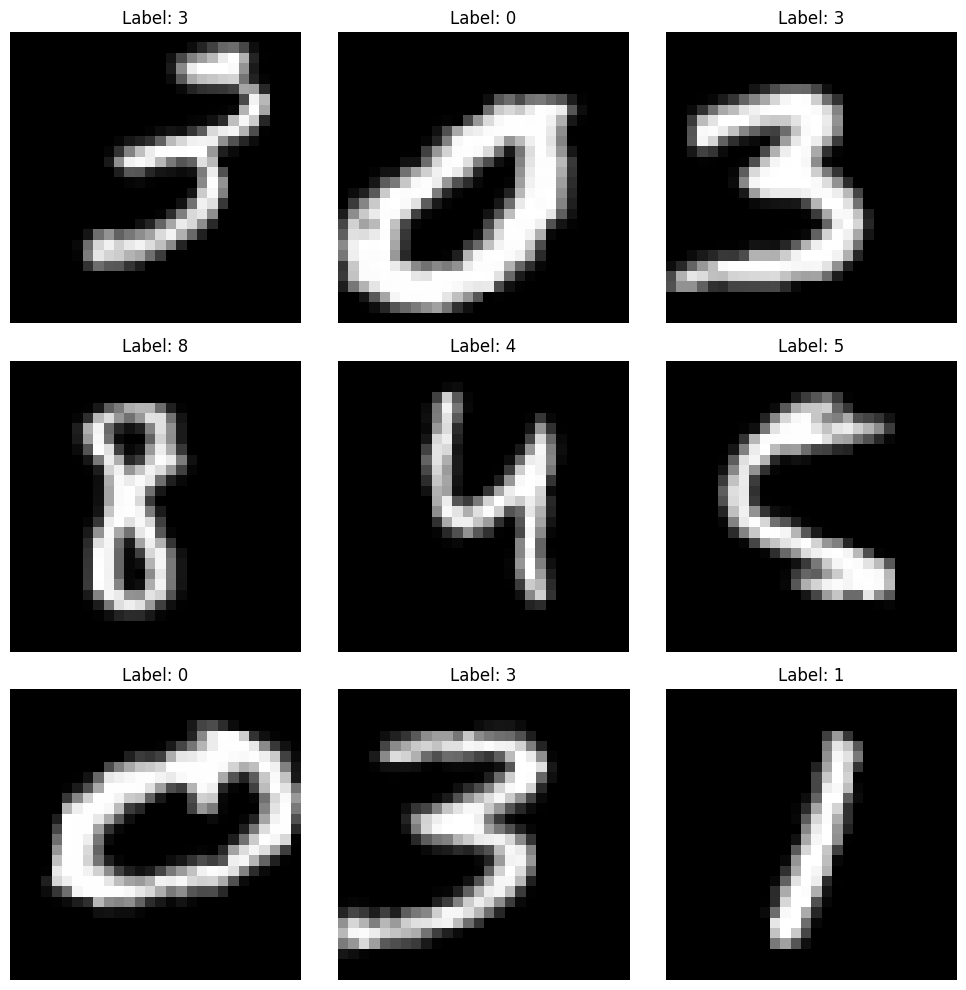

In [ ]:
# Preprocess the dataset
xtrain = xtrain_original.reshape((60000, 28, 28, 1))
xvalid = xvalid_original.reshape((10000, 28, 28, 1))
xtrain = xtrain / 255.0
xvalid = xvalid / 255.0

# One-hot encode the output labels
ytrain = tf.keras.utils.to_categorical(ytrain_original)
yvalid = tf.keras.utils.to_categorical(yvalid_original)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1
)
datagen_flow = datagen.flow(xtrain, ytrain, batch_size=32)

# Visualize a batch of augmented images
print("Visualizing augmented images...")

# Fetch a batch of augmented data
sample_batch = next(datagen_flow)
augmented_images, augmented_labels = sample_batch

# Display a grid of 9 augmented images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(augmented_labels[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()





/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training Model 1: Simple CNN...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


937/937 ━━━━━━━━━━━━━━━━━━━━ 76s 73ms/step - accuracy: 0.7880 - loss: 0.6689 - val_accuracy: 0.9755 - val_loss: 0.0816
Epoch 2/10
  1/937 ━━━━━━━━━━━━━━━━━━━━ 1:07 72ms/step - accuracy: 0.9062 - loss: 0.2822

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9062 - loss: 0.2822 - val_accuracy: 0.9756 - val_loss: 0.0817
Epoch 3/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 74s 67ms/step - accuracy: 0.9558 - loss: 0.1480 - val_accuracy: 0.9842 - val_loss: 0.0509
Epoch 4/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9844 - loss: 0.0861 - val_accuracy: 0.9848 - val_loss: 0.0497
Epoch 5/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 81s 68ms/step - accuracy: 0.9648 - loss: 0.1116 - val_accuracy: 0.9839 - val_loss: 0.0507
Epoch 6/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9688 - loss: 0.0911 - val_accuracy: 0.9831 - val_loss: 0.0525
Epoch 7/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 64s 68ms/step - accuracy: 0.9709 - loss: 0.0943 - val_accuracy: 0.9832 - val_loss: 0.0477
Epoch 8/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9375 - loss: 0.1421 - val_accuracy: 0.9843 - val_loss: 0.0470
Epoch 9/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 63s 67ms/step - accuracy: 0.9756 - loss: 0.0833 - val_accuracy: 0.973

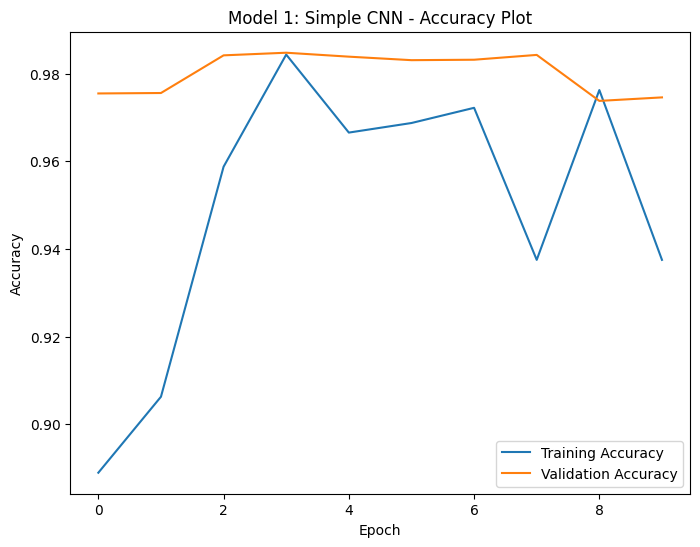

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Confusion Matrix for Model 1: Simple CNN:
 [[ 970    0    6    1    0    0    2    0    1    0]
 [   1 1103    4    5    1    1    2    3   11    4]
 [   1    0 1014   13    0    0    0    2    2    0]
 [   0    0    0 1010    0    0    0    0    0    0]
 [   0    0    7    1  904    0    4    3    7   56]
 [   1    0    0   26    0  864    1    0    0    0]
 [   3    0    0    1    1    4  946    0    3    0]
 [   0    0   12    9    0    0    0 1003    2    2]
 [   0    0    1   14    0    0    0    1  957    1]
 [   0    0    0   23    0    0    0    3    8  975]]

Classification Report for Model 1: Simple CNN:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.97      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.92      1.00      0.96      1010
           4       1.00      0.92      0.96       982
           

In [ ]:
# Model 1: Simple CNN
model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train and store validation accuracy in one step
model1_acc = train_and_evaluate_model(model1, "Model 1: Simple CNN", batch_size=64)



Training Model 2: Deeper CNN...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


937/937 ━━━━━━━━━━━━━━━━━━━━ 323s 343ms/step - accuracy: 0.8331 - loss: 0.5147 - val_accuracy: 0.9867 - val_loss: 0.0386
Epoch 2/10
  1/937 ━━━━━━━━━━━━━━━━━━━━ 4:14 272ms/step - accuracy: 0.9688 - loss: 0.0888

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


937/937 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9688 - loss: 0.0888 - val_accuracy: 0.9873 - val_loss: 0.0371
Epoch 3/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 348s 320ms/step - accuracy: 0.9650 - loss: 0.1141 - val_accuracy: 0.9904 - val_loss: 0.0274
Epoch 4/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9531 - loss: 0.2133 - val_accuracy: 0.9910 - val_loss: 0.0267
Epoch 5/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 310s 321ms/step - accuracy: 0.9732 - loss: 0.0863 - val_accuracy: 0.9923 - val_loss: 0.0241
Epoch 6/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9844 - loss: 0.0446 - val_accuracy: 0.9920 - val_loss: 0.0243
Epoch 7/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 297s 317ms/step - accuracy: 0.9767 - loss: 0.0777 - val_accuracy: 0.9926 - val_loss: 0.0214
Epoch 8/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9688 - loss: 0.1003 - val_accuracy: 0.9926 - val_loss: 0.0214
Epoch 9/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 309s 316ms/step - accuracy: 0.9816 - loss: 0.0620 - val

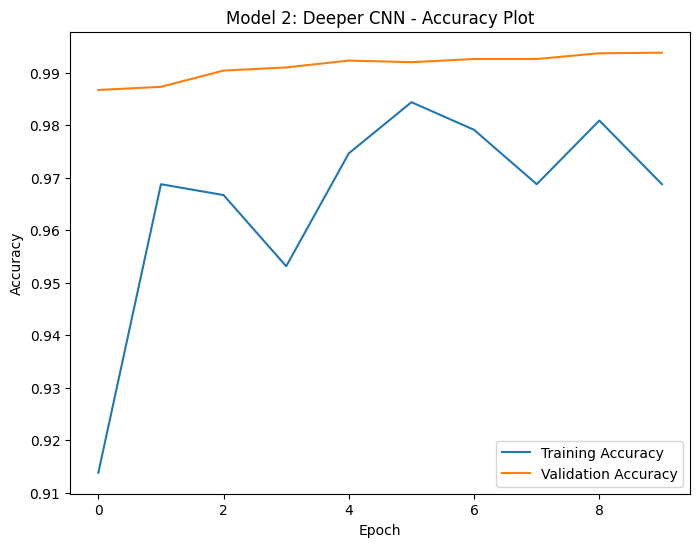

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step
Confusion Matrix for Model 2: Deeper CNN:
 [[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1129    1    1    0    0    0    4    0    0]
 [   1    0 1025    0    0    0    0    6    0    0]
 [   0    1    1 1004    0    2    0    1    1    0]
 [   0    1    0    0  978    0    0    0    1    2]
 [   1    0    0    5    0  884    1    1    0    0]
 [   2    3    0    0    1    1  949    0    2    0]
 [   0    1    1    0    1    0    0 1025    0    0]
 [   0    0    2    0    1    0    0    0  970    1]
 [   0    0    0    0    8    1    0    3    1  996]]

Classification Report for Model 2: Deeper CNN:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      0.99      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
         

In [ ]:
# Model 2: Deeper CNN
model2 = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train and store validation accuracy in one step
model2_acc = train_and_evaluate_model(model2, "Model 2: Deeper CNN", batch_size=64)


Training Model 3: CNN with Batch Normalization...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


937/937 ━━━━━━━━━━━━━━━━━━━━ 150s 157ms/step - accuracy: 0.7275 - loss: 0.9046 - val_accuracy: 0.9802 - val_loss: 0.0588
Epoch 2/10
  1/937 ━━━━━━━━━━━━━━━━━━━━ 1:54 122ms/step - accuracy: 0.9375 - loss: 0.2397

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


937/937 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9375 - loss: 0.2397 - val_accuracy: 0.9797 - val_loss: 0.0618
Epoch 3/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 195s 155ms/step - accuracy: 0.9382 - loss: 0.2127 - val_accuracy: 0.9795 - val_loss: 0.0737
Epoch 4/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9219 - loss: 0.1648 - val_accuracy: 0.9799 - val_loss: 0.0710
Epoch 5/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 196s 155ms/step - accuracy: 0.9558 - loss: 0.1501 - val_accuracy: 0.9843 - val_loss: 0.0496
Epoch 6/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9219 - loss: 0.2911 - val_accuracy: 0.9849 - val_loss: 0.0474
Epoch 7/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 152s 162ms/step - accuracy: 0.9629 - loss: 0.1289 - val_accuracy: 0.9872 - val_loss: 0.0407
Epoch 8/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9844 - loss: 0.1628 - val_accuracy: 0.9875 - val_loss: 0.0396
Epoch 9/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 191s 155ms/step - accuracy: 0.9688 - loss: 0.1080 - val_accurac

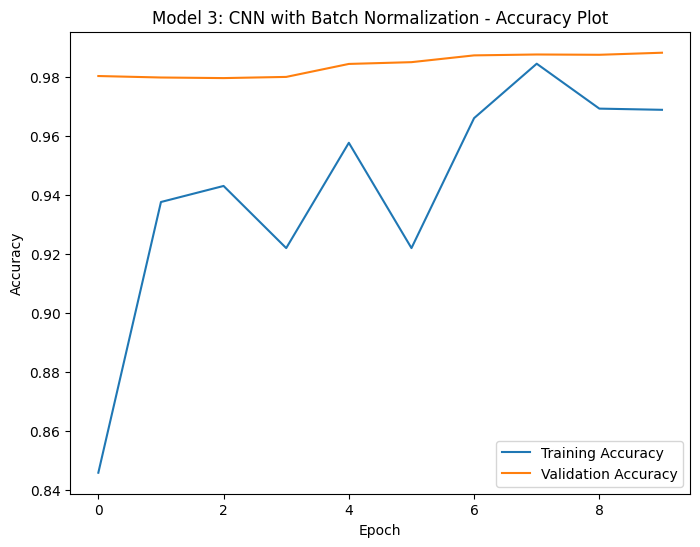

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
Confusion Matrix for Model 3: CNN with Batch Normalization:
 [[ 967    0    1    2    0    0    8    0    2    0]
 [   0 1116    1    0    4    0    7    7    0    0]
 [   1    0 1027    1    1    0    0    2    0    0]
 [   0    0    0 1007    0    1    0    2    0    0]
 [   0    0    0    0  982    0    0    0    0    0]
 [   0    0    0    5    0  886    1    0    0    0]
 [   0    2    0    0    1    4  949    0    2    0]
 [   0    0    4    0    1    0    0 1021    0    2]
 [   0    0    3    0    1    1    0    1  968    0]
 [   0    0    1    6   30    6    0    4    4  958]]

Classification Report for Model 3: CNN with Batch Normalization:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.96     

In [ ]:
# Model 3: CNN with Batch Normalization
model3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train and store validation accuracy
model3_acc = train_and_evaluate_model(model3, "Model 3: CNN with Batch Normalization", batch_size=64)



Training Model 4: Improved Five-Layer CNN...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


937/937 ━━━━━━━━━━━━━━━━━━━━ 217s 227ms/step - accuracy: 0.8943 - loss: 0.3426 - val_accuracy: 0.9706 - val_loss: 0.0942
Epoch 2/10
  1/937 ━━━━━━━━━━━━━━━━━━━━ 2:36 167ms/step - accuracy: 1.0000 - loss: 0.0224

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


937/937 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 1.0000 - loss: 0.0224 - val_accuracy: 0.9706 - val_loss: 0.0953
Epoch 3/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 255s 228ms/step - accuracy: 0.9808 - loss: 0.0646 - val_accuracy: 0.9859 - val_loss: 0.0435
Epoch 4/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 1.0000 - loss: 0.0279 - val_accuracy: 0.9858 - val_loss: 0.0443
Epoch 5/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 254s 228ms/step - accuracy: 0.9854 - loss: 0.0476 - val_accuracy: 0.9895 - val_loss: 0.0311
Epoch 6/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9844 - loss: 0.0422 - val_accuracy: 0.9894 - val_loss: 0.0310
Epoch 7/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 257s 229ms/step - accuracy: 0.9878 - loss: 0.0385 - val_accuracy: 0.9891 - val_loss: 0.0333
Epoch 8/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9844 - loss: 0.0260 - val_accuracy: 0.9893 - val_loss: 0.0333
Epoch 9/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 215s 229ms/step - accuracy: 0.9889 - loss: 0.0357 - val_accurac

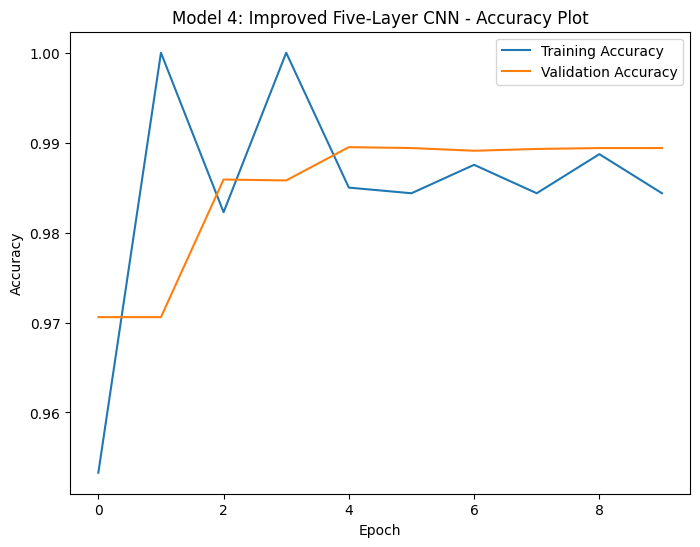

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
Confusion Matrix for Model 4: Improved Five-Layer CNN:
 [[ 975    0    0    0    0    3    1    1    0    0]
 [   0 1126    1    3    0    0    4    1    0    0]
 [   1    0 1015   12    0    0    0    2    2    0]
 [   0    1    0 1001    0    6    0    2    0    0]
 [   0    0    3    0  954    1    3    2    4   15]
 [   0    0    0    2    0  889    1    0    0    0]
 [   1    1    0    0    0    2  953    0    1    0]
 [   0    1    3    1    0    0    0 1022    0    1]
 [   1    0    2    4    0    7    0    0  953    7]
 [   0    0    0    0    1    0    0    2    0 1006]]

Classification Report for Model 4: Improved Five-Layer CNN:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.98      0.99      0.98      1010
           4       1.00      0.97     

In [ ]:
# Model 4: Five-Layer CNN
model4 = Sequential([
    # Convolutional Layer 1
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Convolutional Layer 2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Convolutional Layer 3
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Convolutional Layer 4
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),

    # Global Average Pooling
    GlobalAveragePooling2D(),

    # Fully Connected Layers
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model with a reduced learning rate
model4.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Train and evaluate the model
model4_acc = train_and_evaluate_model(model4, "Model 4: Improved Five-Layer CNN", batch_size=64)




Training Model 5: Optimized Regularized CNN...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


937/937 ━━━━━━━━━━━━━━━━━━━━ 276s 290ms/step - accuracy: 0.5171 - loss: 1.5795 - val_accuracy: 0.9282 - val_loss: 0.2361
Epoch 2/10
  1/937 ━━━━━━━━━━━━━━━━━━━━ 4:02 259ms/step - accuracy: 0.7656 - loss: 0.9073

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


937/937 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7656 - loss: 0.9073 - val_accuracy: 0.9283 - val_loss: 0.2361
Epoch 3/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 316s 292ms/step - accuracy: 0.8287 - loss: 0.5407 - val_accuracy: 0.9571 - val_loss: 0.1429
Epoch 4/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9062 - loss: 0.2758 - val_accuracy: 0.9571 - val_loss: 0.1429
Epoch 5/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 273s 291ms/step - accuracy: 0.8896 - loss: 0.3546 - val_accuracy: 0.9686 - val_loss: 0.1036
Epoch 6/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.8906 - loss: 0.3297 - val_accuracy: 0.9686 - val_loss: 0.1036
Epoch 7/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 297s 287ms/step - accuracy: 0.9137 - loss: 0.2752 - val_accuracy: 0.9741 - val_loss: 0.0865
Epoch 8/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9844 - loss: 0.1088 - val_accuracy: 0.9740 - val_loss: 0.0867
Epoch 9/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 326s 300ms/step - accuracy: 0.9248 - loss: 0.2400 - val_acc

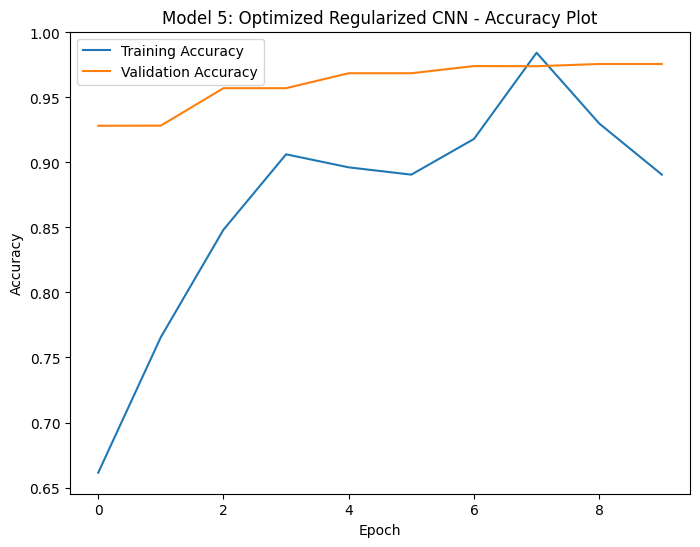

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step
Confusion Matrix for Model 5: Optimized Regularized CNN:
 [[ 975    0    1    0    0    1    1    1    0    1]
 [   0 1131    3    0    1    0    0    0    0    0]
 [   4    4 1005    4    2    0    0   11    2    0]
 [   0    2    3  984    0    7    0    6    3    5]
 [   0    4    0    0  964    0    1    0    0   13]
 [   0    2    0    6    0  875    2    2    1    4]
 [   8    7    0    0    0    1  937    1    4    0]
 [   0   10    5    2    3    0    0 1003    1    4]
 [  15    3    4    1    6    7    5    3  912   18]
 [   5    7    3   11    6    2    1    3    0  971]]

Classification Report for Model 5: Optimized Regularized CNN:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      1.00      0.98      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.98

In [ ]:
# Model 5: Optimized Deeper CNN with Regularization
model5 = Sequential([
    # Convolutional Layer 1
    Conv2D(64, (2, 2), activation='relu', padding='same', input_shape=(28, 28, 1)),
    BatchNormalization(),
    Dropout(0.2),
    MaxPooling2D((2, 2)),

    # Convolutional Layer 2
    Conv2D(128, (2, 2), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Fully Connected Layers
    Flatten(),
    Dense(512, activation='tanh'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

# Compile the model
model5.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train and store validation accuracy
model5_acc = train_and_evaluate_model(model5, "Model 5: Optimized Regularized CNN", batch_size=64)




Training Model 6: Shallow CNN with Dropout...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


937/937 ━━━━━━━━━━━━━━━━━━━━ 154s 163ms/step - accuracy: 0.7371 - loss: 0.8013 - val_accuracy: 0.9759 - val_loss: 0.0886
Epoch 2/10
  1/937 ━━━━━━━━━━━━━━━━━━━━ 3:41 237ms/step - accuracy: 0.9375 - loss: 0.2317

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


937/937 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9375 - loss: 0.2317 - val_accuracy: 0.9758 - val_loss: 0.0883
Epoch 3/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 172s 137ms/step - accuracy: 0.9336 - loss: 0.2193 - val_accuracy: 0.9835 - val_loss: 0.0652
Epoch 4/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9688 - loss: 0.1349 - val_accuracy: 0.9835 - val_loss: 0.0638
Epoch 5/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 130s 139ms/step - accuracy: 0.9514 - loss: 0.1650 - val_accuracy: 0.9830 - val_loss: 0.0612
Epoch 6/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 1.0000 - loss: 0.0556 - val_accuracy: 0.9832 - val_loss: 0.0603
Epoch 7/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 135s 136ms/step - accuracy: 0.9619 - loss: 0.1286 - val_accuracy: 0.9837 - val_loss: 0.0573
Epoch 8/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9844 - loss: 0.0501 - val_accuracy: 0.9838 - val_loss: 0.0572
Epoch 9/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 139s 139ms/step - accuracy: 0.9643 - loss: 0.1206 - val_accurac

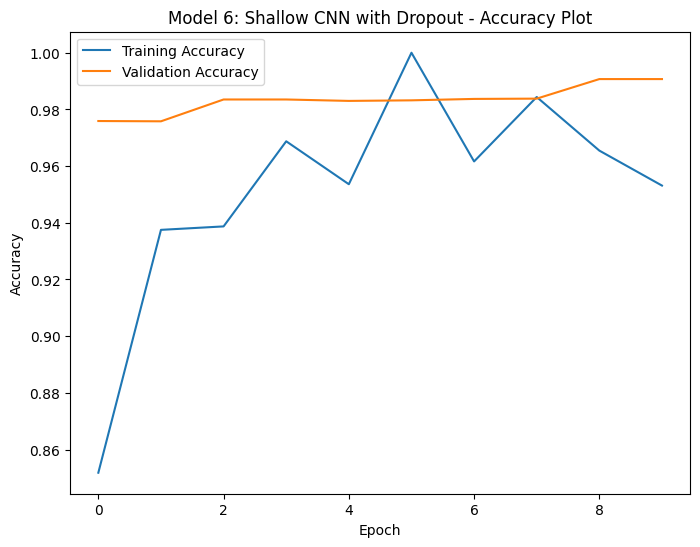

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
Confusion Matrix for Model 6: Shallow CNN with Dropout:
 [[ 973    0    4    0    0    0    1    1    1    0]
 [   0 1124    2    1    2    0    1    1    3    1]
 [   0    0 1029    0    0    0    0    3    0    0]
 [   0    0    0 1007    0    1    0    0    2    0]
 [   0    0    0    0  975    0    0    0    2    5]
 [   0    0    0    9    0  881    1    1    0    0]
 [   0    1    1    0    1    4  948    0    3    0]
 [   0    0    7    0    1    0    0 1015    1    4]
 [   0    0    4    1    1    2    0    1  965    0]
 [   1    1    0    1    8    2    0    1    5  990]]

Classification Report for Model 6: Shallow CNN with Dropout:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99   

In [ ]:
# Model 6: Shallow CNN with Different Dropout
model6 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    Dropout(0.4),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model6.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Train and evaluate the model
model6_acc = train_and_evaluate_model(model6, "Model 6: Shallow CNN with Dropout", batch_size=64)
